In [31]:
import numpy as np
import pandas as pd
from scipy.fft import rfft, rfftfreq

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [72]:
# sampling rate
fs = 1000*14e6
print(fs)

ts = 1.0/fs
t_stop = 2e-6 # in seconds

t = np.arange(0, t_stop, ts)
c = 3e8

# x = np.arange(0, 2 * np.pi, ts)
x = 0

14000000000.0


In [138]:
def calc_k(lamb):
    return 2 * np.pi / lamb

def calc_w(freq):
    return 2 * np.pi * freq

def calc_lamb(v, f):
    return v / f
    
def calc_freq(v, lamb):
    return lamb / v

def calc_ts(fs):
    return 1/fs

def wave(c, f, phy, x, t):
    lamb = calc_lamb(c, f)
    k = calc_k(lamb)
    w = calc_w(f)
    return np.cos(k*x - w*t + phi)

def center_freq(f1, f2):
    return (f1 + f2) / 2

def center_freq_plot(f1, f2):
    arr = np.array([f1,f2])
    max_f = np.max(arr)
    center_f = center_freq(f1, f2)
    diff_f = 2*abs(center_f - max_f)
    
    lower_limit = center_f - diff_f
    upper_limit = center_f + diff_f
    
    if lower_limit < 0 :
        lower_limit = 0
        
    return [lower_limit, upper_limit]

In [142]:
f1 = 14e6
phi1 = 0

lamb1 = calc_lamb(c, f1)
k1 = calc_k(lamb1)
w1 = calc_w(f1)
s1 = np.cos(k1*x - w1*t + phi1)

In [151]:
f2 = 14e6 + 3e6
phi2 = 0

lamb2 = calc_lamb(c, f2)
k2 = calc_k(lamb2)
w2 = calc_w(f2)
s2 = np.cos(k2*x - w2*t + phi2)

In [152]:
s_tot = s1 + s2

In [153]:
# Number of samples in normalized_tone
N = int(1000 * fs * t_stop)

yf = rfft(s_tot, N)
xf = rfftfreq(N, 1 / fs)

Freq 1 = 14000000.0[Hz]
Freq 2 = 17000000.0[Hz]
Fs = 14000000000.0[Hz]
Time = 2e-06[s]


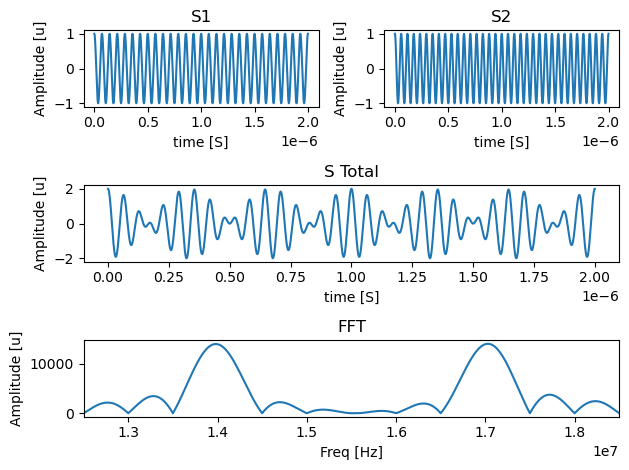

In [156]:
print('Freq 1 = ' + str(f1) + '[Hz]')
print('Freq 2 = ' + str(f2) + '[Hz]')
print('Fs = ' + str(fs) + '[Hz]')
print('Time = ' + str(t_stop) + '[s]')


fig = plt.figure(tight_layout=True)
gs = gridspec.GridSpec(3, 2)

ax = fig.add_subplot(gs[0, 0])
ax.plot(t, s1)
ax.set_ylabel('Amplitude [u]')
ax.set_xlabel('time [S]')
ax.set_title('S1')

ax = fig.add_subplot(gs[0, 1])
ax.plot(t, s2)
ax.set_ylabel('Amplitude [u]')
ax.set_xlabel('time [S]')
ax.set_title('S2')

ax = fig.add_subplot(gs[1, :])
ax.plot(t, s_tot)
ax.set_ylabel('Amplitude [u]')
ax.set_xlabel('time [S]')
ax.set_title('S Total')

ax = fig.add_subplot(gs[2, :])
ax.plot(xf, np.abs(yf))
ax.set_ylabel('Amplitude [u]')
ax.set_xlabel('Freq [Hz]')
ax.set_title('FFT')
limits_f = center_freq_plot(f1, f2)
ax.set_xlim(limits_f[0], limits_f[1])

plt.show()